In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
# import Jespers dataset with removed outliers
portland2021 = pd.read_csv('portland.csv', sep=',') 

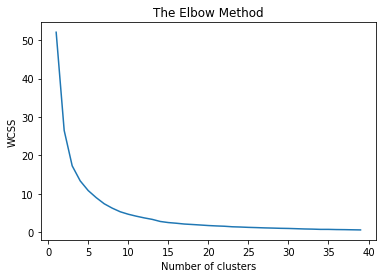

In [36]:
# find optimal number of clusters using elbow method
wcss = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(portland2021[['Start_Lng', 'Start_Lat']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 40), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/jakobtolstrup/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


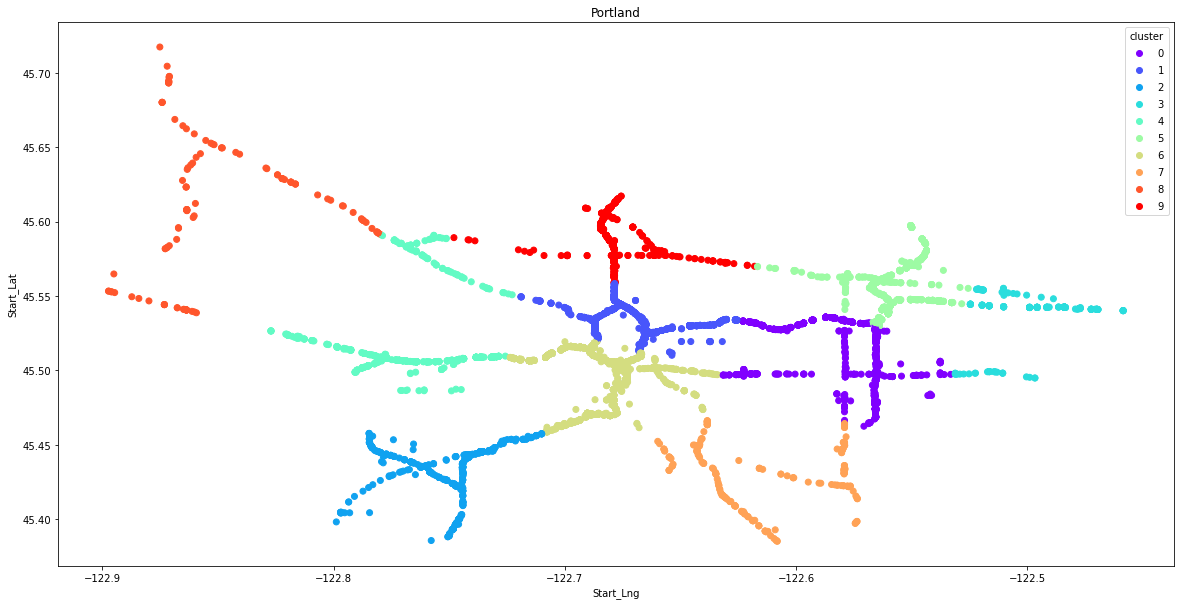

In [37]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(portland2021[['Start_Lng', 'Start_Lat']])
portland2021['cluster_location'] = kmeans.labels_

# plot the clusters and add legend to the plot using fig, ax
fig, ax = plt.subplots()
scatter = ax.scatter(portland2021['Start_Lng'], portland2021['Start_Lat'], c=portland2021['cluster_location'], cmap='rainbow')
ax.set_xlabel('Start_Lng')
ax.set_ylabel('Start_Lat')
ax.set_title('Portland')
ax.legend(*scatter.legend_elements(), title='cluster')
# set fig size
fig.set_size_inches(20, 10)
plt.show()


### With DB scan

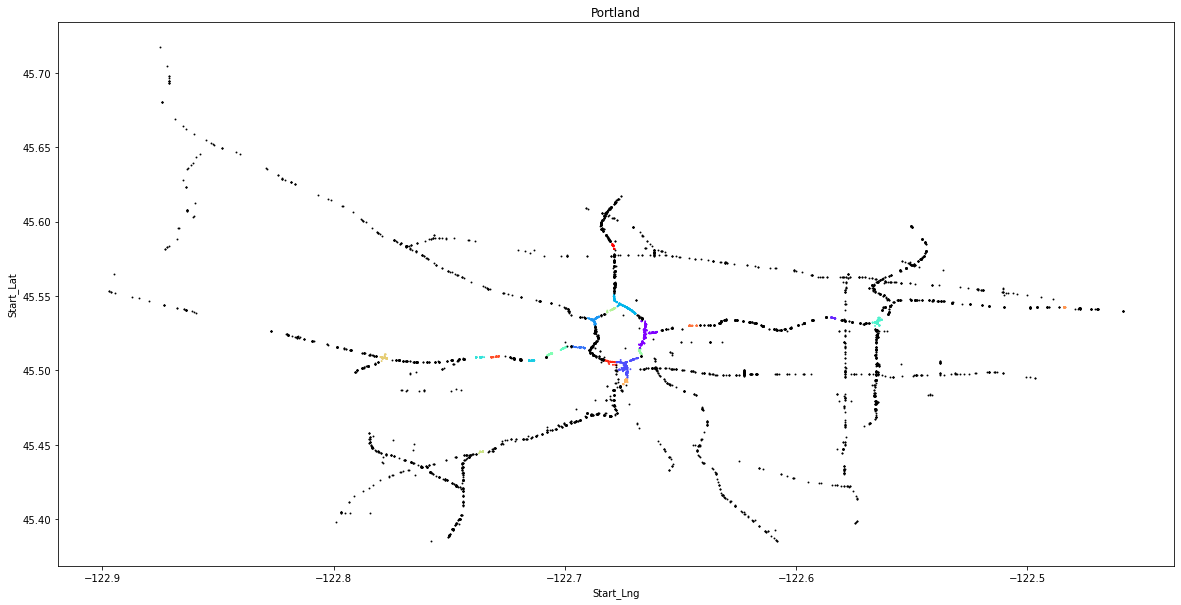

In [38]:
#DBSCAN. De to vigtige parametre er min_samples (som angiver hvor mange punkter der skal være i et cluster) og eps (som angiver hvor langt væk punkterne må være fra hinanden for at være i samme cluster) (groft sagt)
#Antallet af clusters og størrelsen kan justeres ved at ændre på disse to parametre
latlng = portland2021[['Start_Lng', 'Start_Lat']]

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.002, min_samples=50).fit(latlng)
portland2021['cluster_location_db'] = dbscan.labels_
#Make a seperate dataframe with only the outliers
outliers = portland2021[portland2021['cluster_location_db'] == -1]
#Make a seperate dataframe with only the clusters
clusters = portland2021[portland2021['cluster_location_db'] != -1]
#plot the clusters and outliers
fig, ax = plt.subplots()
ax.scatter(clusters['Start_Lng'], clusters['Start_Lat'], c=clusters['cluster_location_db'], cmap='rainbow', s=0.8)
ax.scatter(outliers['Start_Lng'], outliers['Start_Lat'], c='black', s=0.8 )
ax.set_xlabel('Start_Lng')
ax.set_ylabel('Start_Lat')
ax.set_title('Portland')
fig.set_size_inches(20,10)
plt.show()

In [39]:
portland2021.cluster_location_db.unique()

array([-1,  0,  7,  1,  2,  4,  3,  5, 20,  6, 14, 13,  8,  9, 10, 11, 12,
       15, 16, 17, 19, 18])

In [40]:
#Lasse
portland2021['Date'] = pd.to_datetime(portland2021['Start_Time']).dt.date
portland2021['Year'] = pd.to_datetime(portland2021['Start_Time']).dt.year
portland2021['Month'] = pd.to_datetime(portland2021['Start_Time']).dt.month
portland2021['Day_of_Week'] = pd.to_datetime(portland2021['Start_Time']).dt.dayofweek
portland2021['Hour'] = pd.to_datetime(portland2021['Start_Time']).dt.hour

In [41]:
#We replace the missing values with the mean
portland2021['Visibility(mi)'].fillna(portland2021['Visibility(mi)'].mean(), inplace=True)

#We see that the data is skewed to the right. We can use the log transformation to make the data more normal. 
#Here we are using the natural log on each value in the visibility column.
portland2021['Visibility(mi)'] = np.log(portland2021['Visibility(mi)'])

#Remove values that are below or equal to 0 as negative visibility is not possible.
portland2021 = portland2021[portland2021['Visibility(mi)'] > 0]

In [42]:
# We aggregate weather conditions categories into 7 larger categories, specifically: Cloudy, Fair, Rain, Snow, Thunder, Fog and Wintry Mix

#Combine Cloudy, Mosty Cloudy, Partly Cloudy, Mostly Cloudy / Windy, Cloudy / Windy
portland2021['Weather_Condition'] = portland2021['Weather_Condition'].replace(['Cloudy', 'Mostly Cloudy', 'Mostly Cloudy / Windy', 'Cloudy / Windy'], 'Cloudy')
#Combine Fair, Fair / Windy, Partly Cloudy
portland2021['Weather_Condition'] = portland2021['Weather_Condition'].replace(['Fair', 'Fair / Windy', 'Partly Cloudy'], 'Fair')
#Combine Rain, Heavy Rain, Light Rain, Light Rain / Windy, Heavy Rain / Windy, Rain / Windy
portland2021['Weather_Condition'] = portland2021['Weather_Condition'].replace(['Rain', 'Heavy Rain', 'Light Rain', 'Light Rain / Windy', 'Heavy Rain / Windy', 'Rain / Windy', 'Light Freezing Drizzle', 'Light Drizzle'], 'Rain')
#Combine Snow, Light Snow, Light Snow / Windy, Snow / Windy, Light Snow and Sleet, Light Snow and Sleet / Windy
portland2021['Weather_Condition'] = portland2021['Weather_Condition'].replace(['Light Snow', 'Snow', 'Light Snow / Windy', 'Snow / Windy', 'Light Snow and Sleet', 'Light Snow and Sleet / Windy'], 'Snow')
#Combine Thunderstorm, Thunderstorm / Windy, Thunderstorm with Hail, Thunderstorm with Hail / Windy, Thunderstorm with Light Rain, Thunderstorm with Light Rain / Windy, Thunderstorm with Rain, Thunderstorm with Rain / Windy, T-Storm, T-Storm / Windy, T-Storm with Hail, T-Storm with Hail / Windy, T-Storm with Light Rain, T-Storm with Light Rain / Windy, T-Storm with Rain, T-Storm with Rain / Windy, Thunder in the Vicinity
portland2021['Weather_Condition'] = portland2021['Weather_Condition'].replace(['Thunderstorm', 'Thunderstorm / Windy', 'Thunderstorm with Hail', 'Thunderstorm with Hail / Windy', 'Thunderstorm with Light Rain', 'Thunderstorm with Light Rain / Windy', 'Thunderstorm with Rain', 'Thunderstorm with Rain / Windy', 'T-Storm', 'T-Storm / Windy', 'T-Storm with Hail', 'T-Storm with Hail / Windy', 'T-Storm with Light Rain', 'T-Storm with Light Rain / Windy', 'T-Storm with Rain', 'T-Storm with Rain / Windy', 'Thunder in the Vicinity'], 'Thunder')
#Combine Fog, Fog / Windy, Hazey, Haze, Haze / Windy, Smoke, Smoke / Windy
portland2021['Weather_Condition'] = portland2021['Weather_Condition'].replace(['Fog', 'Fog / Windy', 'Haze', 'Haze / Windy', 'Smoke', 'Smoke / Windy', 'Mist', 'Shallow Fog', 'Patches of Fog'], 'Fog')
#Combine wintry mix, wintry mix / windy, sleet, sleet / windy, freezing rain, freezing rain / windy, freezing drizzle, freezing drizzle / windy, light freezing rain, light freezing rain / windy, light freezing drizzle, light freezing drizzle / windy
portland2021['Weather_Condition'] = portland2021['Weather_Condition'].replace(['Wintry Mix', 'Wintry Mix / Windy', 'Sleet', 'Sleet / Windy', 'Freezing Rain', 'Freezing Rain / Windy', 'Freezing Drizzle', 'Freezing Drizzle / Windy', 'Light Freezing Rain', 'Light Freezing Rain / Windy', 'Light Freezing Drizzle', 'Light Freezing Drizzle / Windy'], 'Wintry Mix')

# We remove the rows with Weather_Condition = N/A Precipitation
portland2021 = portland2021[portland2021['Weather_Condition'] != 'N/A Precipitation']

# We one hot encode Weather_Condition
# portland2021 = pd.get_dummies(portland2021, columns=['Weather_Condition'], prefix = ['Weather_Condition'])

In [43]:
#We have missing values in the 'Sunrise_Sunset' column, that we replace with the most fequent value
portland2021['Sunrise_Sunset'].fillna(portland2021['Sunrise_Sunset'].mode()[0], inplace=True)

In [44]:
#Binary encode Sunrise_Sunset, Traffic_Calming, Crossing and Junction
portland2021['Sunrise_Sunset'] = portland2021['Sunrise_Sunset'].replace(['Day', 'Night'], [1, 0])
portland2021['Traffic_Calming'] = portland2021['Traffic_Calming'].replace([False, True], [0, 1])
portland2021['Crossing'] = portland2021['Crossing'].replace([False, True], [0, 1])
portland2021['Junction'] = portland2021['Junction'].replace([False, True], [0, 1])

In [45]:
portland2021.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Date', 'Year', 'Month', 'Day_of_Week', 'Hour',
       'cluster_location', 'cluster_location_db'],
      dtype='object')

In [46]:
#Create a new data frame with the columns we want to use for our model. The columns we want to use are: Crossing, Junction, Traffic_Calming, Visibility(mi), Sunrise_Sunset, Weather_Condition, Month, Day_of_Week, Hour, Year, Date, Station, Severity, Distance(mi), Temperature(F), Wind_Chill(F), Humidity(%), Pressure(in), Wind_Speed(mph), Precipitation(in)
portland2021 = portland2021[['Distance(mi)', 'cluster_location', 'Crossing', 'Junction', 'Traffic_Calming', 'Visibility(mi)', 'Sunrise_Sunset', 'Weather_Condition', 'Month', 'Day_of_Week', 'Hour', 'Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)', 'Precipitation(in)']]

In [47]:
portland2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6902 entries, 0 to 7019
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distance(mi)       6902 non-null   float64
 1   cluster_location   6902 non-null   int32  
 2   Crossing           6902 non-null   int64  
 3   Junction           6902 non-null   int64  
 4   Traffic_Calming    6902 non-null   int64  
 5   Visibility(mi)     6902 non-null   float64
 6   Sunrise_Sunset     6902 non-null   int64  
 7   Weather_Condition  6902 non-null   object 
 8   Month              6902 non-null   int64  
 9   Day_of_Week        6902 non-null   int64  
 10  Hour               6902 non-null   int64  
 11  Severity           6902 non-null   int64  
 12  Temperature(F)     6896 non-null   float64
 13  Wind_Chill(F)      6871 non-null   float64
 14  Humidity(%)        6895 non-null   float64
 15  Pressure(in)       6902 non-null   float64
 16  Wind_Speed(mph)    6872 

In [48]:
# Save before onehot encoding
portland2021.to_csv('cleaned_data_kmodes.csv', index=False)

In [49]:
#One hot encode the categorical columns in portland2021
portland2021 = pd.get_dummies(portland2021, columns=None)

#One hot encode cluster_location
portland2021 = pd.get_dummies(portland2021, columns=['cluster_location'], prefix = ['cluster_location'])



In [50]:
portland2021.head()

,Distance(mi),Crossing,Junction,Traffic_Calming,Visibility(mi),Sunrise_Sunset,Month,Day_of_Week,Hour,Severity,...,cluster_location_0,cluster_location_1,cluster_location_2,cluster_location_3,cluster_location_4,cluster_location_5,cluster_location_6,cluster_location_7,cluster_location_8,cluster_location_9
0,2.141,0,1,0,1.791759,1,12,0,9,2,...,0,0,1,0,0,0,0,0,0,0
1,0.014,0,0,0,2.302585,1,6,2,20,2,...,1,0,0,0,0,0,0,0,0,0
2,2.865,0,0,0,1.386294,1,12,0,10,2,...,0,0,0,0,0,0,0,0,0,1
3,8.573,0,0,0,2.302585,1,7,4,9,2,...,1,0,0,0,0,0,0,0,0,0
4,0.519,0,0,0,2.302585,1,8,4,12,2,...,0,1,0,0,0,0,0,0,0,0


In [51]:
#Export the cleaned data to a csv file
portland2021.to_csv('cleaned_data_kmeans.csv', index=False)